In [1]:
%matplotlib notebook
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
%config InlineBackend.figure_format = 'svg'

from matplotlib.pyplot import*
from numpy import zeros, array,log,dot,sqrt,conjugate,real,imag,arange,transpose
from scipy.sparse.linalg import eigs
from scipy.linalg import eigh,eig,expm
from scipy.optimize import minimize
from copy import deepcopy
from time import time
import pickle
from scipy.sparse.linalg import eigs

In [2]:
def shannon_st(st):
    s=0
    for a in st:
        if abs(a)>0.000000001:
            s-=abs(a**2)*log(abs(a**2))
    return s

In [3]:
def Hamiltonian(lambd):
    H=zeros((17,17))
    for m in range(16):
        st_string=bin(m)[2:]
        st_string='0'*(4-len(st_string))+st_string
        for i in range(4):
            new_string=st_string[:i]+str(1-int(st_string[i]))+st_string[i+1:]
            n=int(new_string,2)
            H[n,m]=1
        H[m,m]=lambd*4
        H[15,15]=lambd*5
        H[16,16]=lambd
        H[15,16]=1
        H[16,15]=1
    return H

In [4]:
fpq=zeros((17,17))
for i in range(15):
    fpq[i,i]=4
fpq[15,15]=5
fpq[16,16]=1

<IPython.core.display.Javascript object>


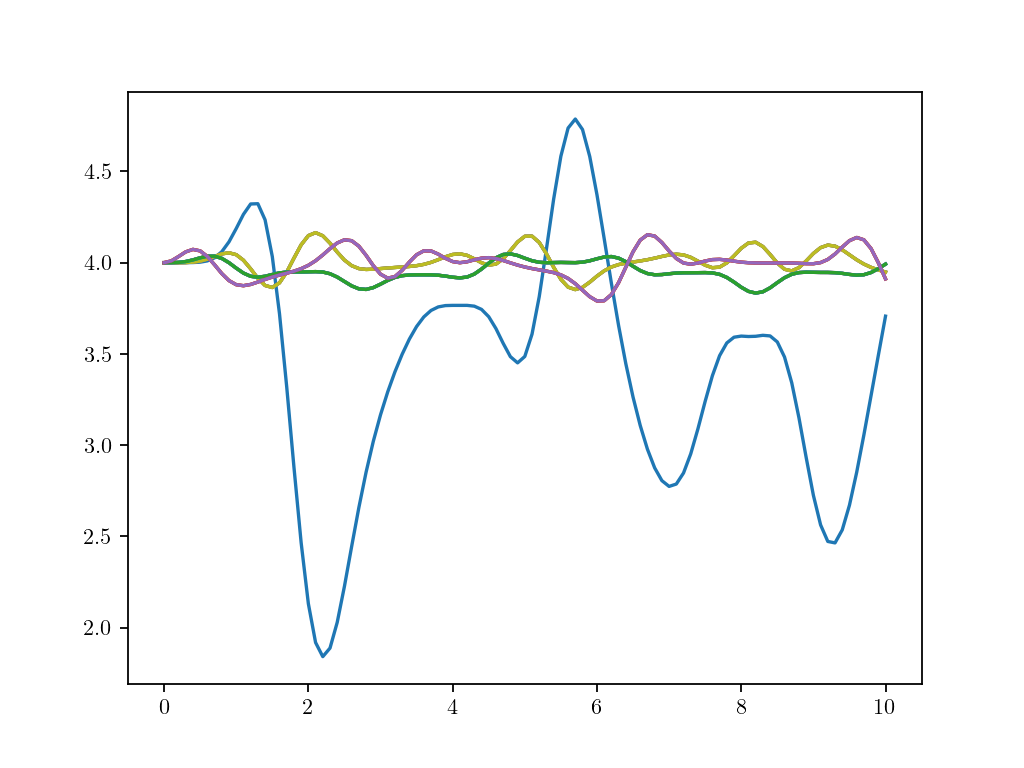

In [8]:
H=Hamiltonian(.0)
dt=.1
U=expm(-1.j*dt*H)
for n in range(0,15):
    v0=zeros(17)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(17,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(100):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=n)
#legend(loc=0)

<IPython.core.display.Javascript object>


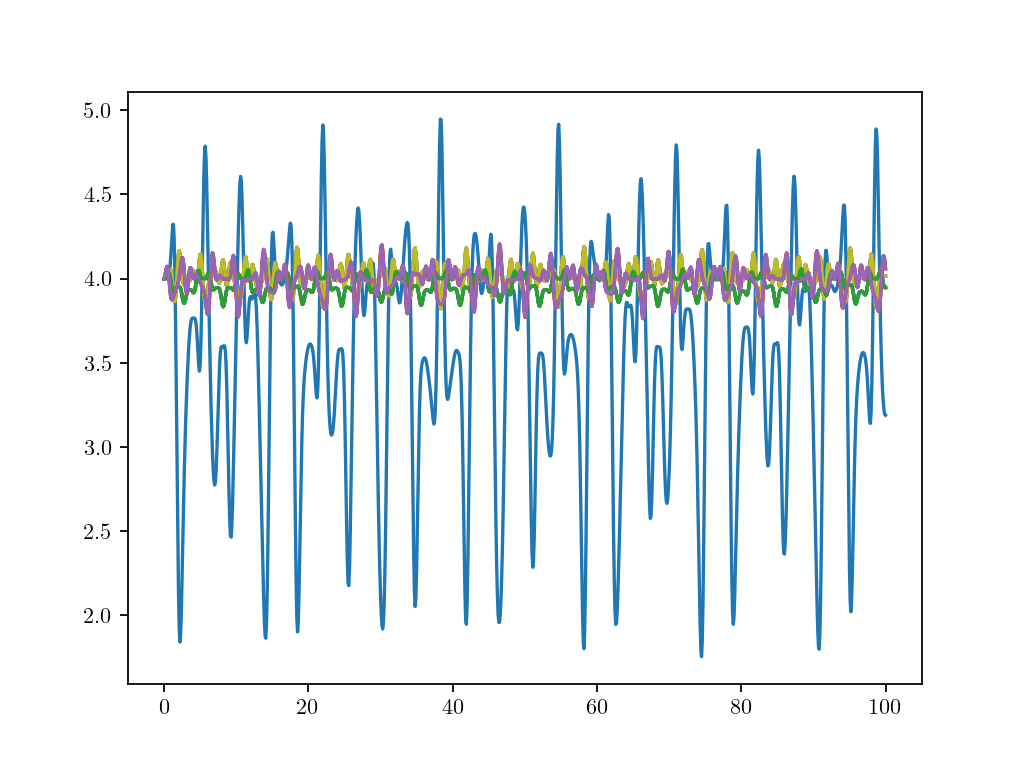

In [9]:
H=Hamiltonian(.0)
dt=.1
U=expm(-1.j*dt*H)
for n in range(0,15):
    v0=zeros(17)
    v0[n]=1
    xx=[0]
    yy=[real(dot(conjugate(v0),dot(fpq,v0)))]
    v=zeros(17,complex)
    v+=v0
    yy=[fpq[n,n]]
    for t in arange(1000):
        xx+=[t*dt+dt]
        v=dot(U,v)
        yy+=[real(dot(conjugate(v),dot(fpq,v)))]
        #yy+=[abs(dot(conjugate(v0),v))]
    plot(xx,yy,'-',label=n)
#legend(loc=0)

In [67]:
w,v=eigh(H)

In [157]:
sh=[shannon_st(v[:,i]) for i in range(17)]

<IPython.core.display.Javascript object>


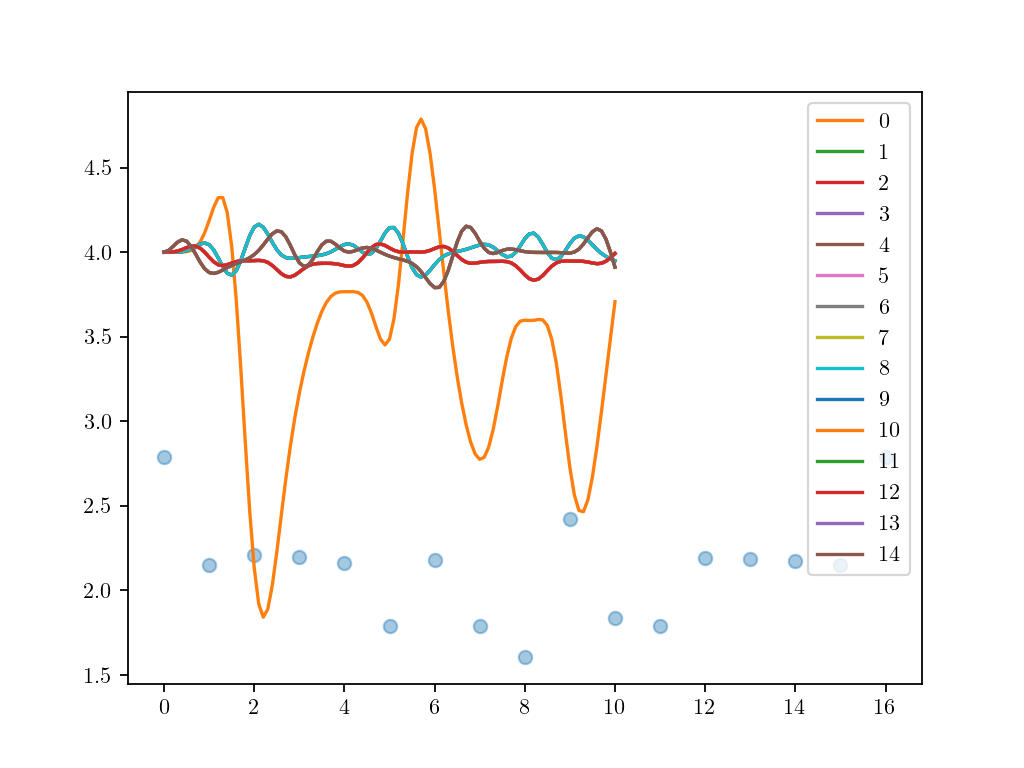

In [159]:
plot(range(17),sh,'o',alpha=.4)

In [152]:
v0=zeros(17)
v0[0]=1

In [154]:
w,v=eigh(H)

<IPython.core.display.Javascript object>


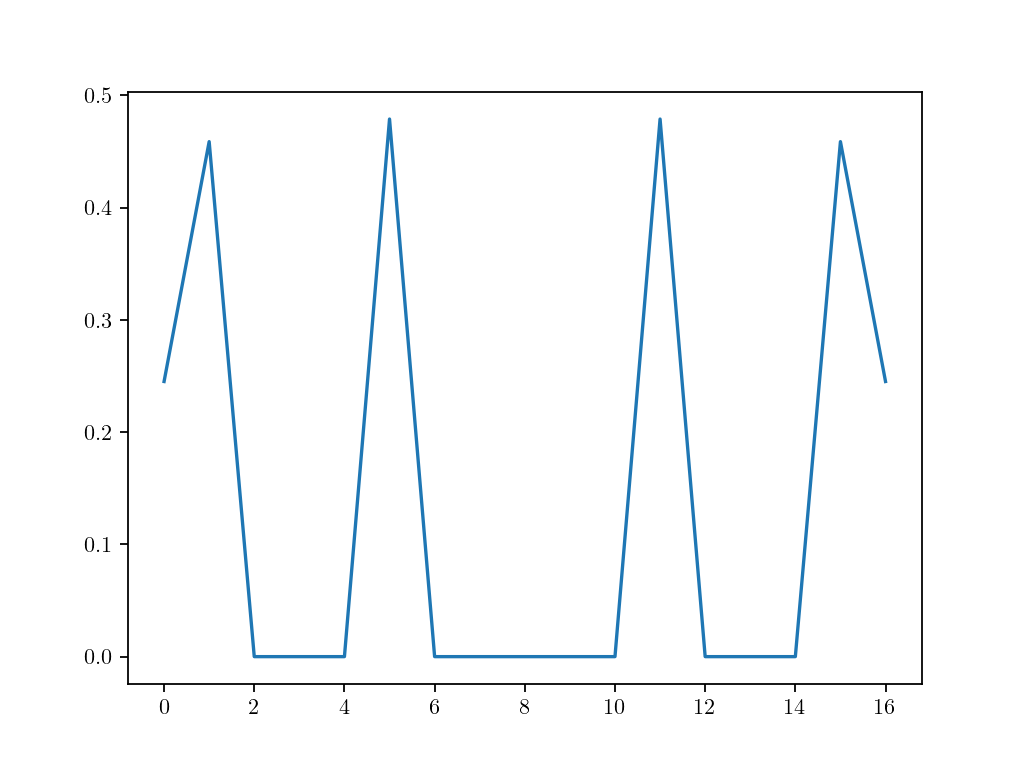

In [156]:
plot(range(17),[abs(v[0,i]) for i in range(17)])